In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style("whitegrid")
import warnings as i
i.filterwarnings('ignore')

In [3]:
#reading data

data = pd.read_csv('credit_card.csv')
df = data.copy()
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


## DATA DESCRIPTION

In [4]:
#data description
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
#check for null values
df.isna().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Dropping Cust id (Not required)

In [6]:
X = df.iloc[:, 1:]
X.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
X.shape

(8950, 17)

## No categorical column to be analysed

# HANDLING MISSING VALUES

#### we saw that MINIMUM_PAYMENTS   has 313 nan values. So handling it using median imputation.

In [7]:
X.MINIMUM_PAYMENTS=X.MINIMUM_PAYMENTS.fillna(X.MINIMUM_PAYMENTS.median())
X.CREDIT_LIMIT=X.CREDIT_LIMIT.fillna(X.CREDIT_LIMIT.median())

In [8]:
X.isna().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

# OUTLIER HANDLING

In [9]:
def detect_outliers(data):
    outliers=[]
    threshold=3
    a = X[data]
    mean = np.mean(a)
    std =np.std(a)
    
    
    for i in a:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers

In [10]:
feature_outliercount = {}
for i,col in enumerate(X, 1):
    outlier_pt=detect_outliers(col)
    print("--------------------------->")
    print(f"{col} : {outlier_pt}")
    feature_outliercount[col] =len(outlier_pt)

--------------------------->
BALANCE : [12136.219959999999, 8181.251131, 9381.255094, 8504.876253, 14224.115409999999, 11167.23403, 9354.06045, 19043.13856, 10598.467770000001, 13673.079609999999, 11972.011040000001, 8350.145568, 9047.621884, 9612.21512, 7938.559134, 8097.334733, 9261.310686, 9206.811695999999, 8939.461145000001, 8806.866629, 11278.95243, 12474.72954, 7957.017218000001, 11209.37076, 9335.31417, 8647.057641, 9601.071318, 10249.71178, 12478.172859999999, 13479.288209999999, 15258.2259, 11547.52001, 8997.488544, 9149.4096, 9559.783145, 7975.19143, 15244.74865, 8781.831676, 8900.194109, 14411.957980000001, 10359.45471, 13763.473580000002, 7811.234173999999, 13774.74154, 10397.099890000001, 9470.18498, 8646.143734000001, 9164.724752, 8220.740014, 11083.325420000001, 10131.00055, 9901.685569, 11654.55492, 14581.45914, 9255.143419, 12358.321320000001, 12373.33348, 8823.284205, 8115.039014, 8884.816576000001, 9387.614011, 7994.331679999999, 7886.875681999999, 9680.188434, 8787

--------------------------->
MINIMUM_PAYMENTS : [12465.54938, 13557.29726, 17862.55831, 8242.687678, 9827.045323, 18621.01331, 12854.9397, 8517.258683, 9952.672511, 27631.450719999997, 17494.90735, 15914.48462, 19977.005719999997, 8269.955787, 38512.12477, 10636.14839, 8096.7950200000005, 10592.537190000001, 15914.72154, 9170.428051, 24302.09819, 12866.94167, 10774.73572, 9642.502512000001, 10849.438090000001, 12245.92601, 13266.3819, 17693.07847, 30528.4324, 8791.735512000001, 9285.151136, 19060.53475, 27146.02678, 12256.998520000001, 9627.891511, 9957.742740000002, 10800.046190000001, 8289.636536, 15584.097419999998, 26143.17049, 11760.91651, 13453.34489, 28483.25483, 26378.90782, 11652.56511, 17563.485419999997, 18959.86938, 10285.13412, 10729.24905, 10474.56452, 19443.45352, 21235.0653, 13621.70839, 16638.3541, 76406.20752000001, 50260.75947, 7912.050279000001, 8644.138069, 12449.67391, 25697.63772, 8296.912755, 11142.93224, 7960.080674, 13350.55682, 9294.994141, 8724.958739, 31871

### we can see that we have many outliers in each feature..count of outliers in each feature has been stated below:

In [11]:
feature_outliercount

{'BALANCE': 196,
 'BALANCE_FREQUENCY': 176,
 'PURCHASES': 135,
 'ONEOFF_PURCHASES': 122,
 'INSTALLMENTS_PURCHASES': 137,
 'CASH_ADVANCE': 182,
 'PURCHASES_FREQUENCY': 0,
 'ONEOFF_PURCHASES_FREQUENCY': 0,
 'PURCHASES_INSTALLMENTS_FREQUENCY': 0,
 'CASH_ADVANCE_FREQUENCY': 199,
 'CASH_ADVANCE_TRX': 172,
 'PURCHASES_TRX': 185,
 'CREDIT_LIMIT': 152,
 'PAYMENTS': 159,
 'MINIMUM_PAYMENTS': 102,
 'PRC_FULL_PAYMENT': 0,
 'TENURE': 394}

In [12]:
#treating outliers with z-score method

from scipy import stats
z = np.abs(stats.zscore(X))
print(z)

### Finding Threshold higher than 3
threshold = 3
print(np.where(z > 3))


x = X[(z < 3).all(axis=1)]

print(f"Before Removing Outliers rows:{X.shape[0]},After Removing Outliers rows:{x.shape[0]}, total outliers removed:{X.shape[0]-x.shape[0]}")

[[0.73198937 0.24943448 0.42489974 ... 0.3024     0.52555097 0.36067954]
 [0.78696085 0.13432467 0.46955188 ... 0.09749953 0.2342269  0.36067954]
 [0.44713513 0.51808382 0.10766823 ... 0.0932934  0.52555097 0.36067954]
 ...
 [0.7403981  0.18547673 0.40196519 ... 0.32687479 0.32919999 4.12276757]
 [0.74517423 0.18547673 0.46955188 ... 0.33830497 0.32919999 4.12276757]
 [0.57257511 0.88903307 0.04214581 ... 0.3243581  0.52555097 4.12276757]]
(array([   6,   19,   20, ..., 8947, 8948, 8949]), array([ 3, 14, 14, ..., 16, 16, 16]))
Before Removing Outliers rows:8950,After Removing Outliers rows:7434, total outliers removed:1516


# SCALING

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(x)

# PCA

([<matplotlib.axis.XTick at 0x7fe60f6a5ca0>,
 <a list of 2 Text major ticklabel objects>)

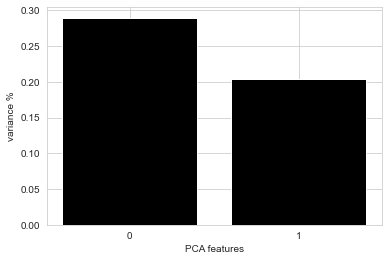

In [14]:
from sklearn.decomposition import PCA
# Create a PCA instance: pca
pca = PCA(n_components=2)
pcomponents = pca.fit_transform(X_std)

# Save components to a DataFrame
pcomponents = pd.DataFrame(pcomponents)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [16]:
pcomponents.head()

,0,1
0,-1.330771,-2.040073
1,-2.776085,3.320138
2,1.238102,0.543248
3,-0.574561,-0.219475
4,-1.452058,-1.461343


In [18]:
plt.scatter(pcomponents[:,0],pcomponents[:,1],c=X['TENURE'])

TypeError: '(slice(None, None, None), 0)' is an invalid key

# Finding apt k

# elbow method:

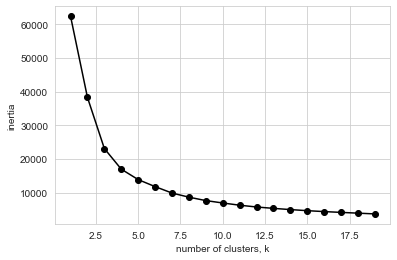

In [15]:
from sklearn.cluster import KMeans
score_1 = {}
inertias = []
range_values = range(1, 20)
for i in range_values:
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(pcomponents)
    #score_1.append(kmeans.inertia_)
    score_1[i] = kmeans.inertia_
    inertias.append(kmeans.inertia_)
    
plt.plot(range_values, inertias, '-o', color='black')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
#plt.xticks('k')
plt.show()

In [16]:
#scores of elbow method
score_1

{1: 62378.16006253041,
 2: 38292.52060268275,
 3: 23129.25890830657,
 4: 17012.706658735,
 5: 13917.587169508719,
 6: 11837.865247858734,
 7: 9931.329648430537,
 8: 8705.099693869231,
 9: 7691.637518448492,
 10: 6980.611579813754,
 11: 6321.621352644809,
 12: 5791.203820321928,
 13: 5383.978712701696,
 14: 5022.3258027101065,
 15: 4700.097654579645,
 16: 4427.123184692784,
 17: 4190.571291122676,
 18: 3961.6498469309026,
 19: 3737.6643206055182}

## Silhouette method

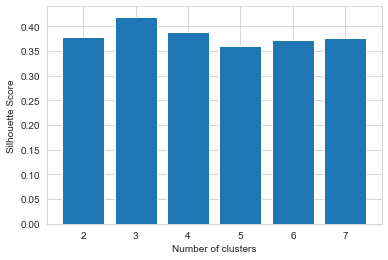

In [17]:
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 8):
    silhouette_scores.append( 
        silhouette_score(pcomponents, KMeans(n_clusters = n_cluster).fit_predict(pcomponents))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

### considering both methods I assume k=3 appears to be good

In [18]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,init='k-means++',random_state=42)
y_km=kmeans.fit_predict(pcomponents)
y_km

array([2, 1, 0, ..., 2, 2, 2], dtype=int32)

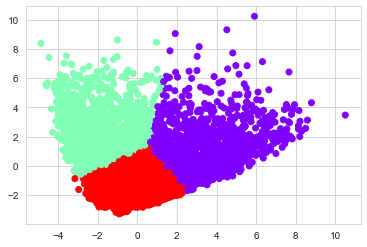

In [19]:
plt.scatter(pcomponents.iloc[:,0],pcomponents.iloc[:,1],c=y_km,cmap='rainbow')
plt.show()

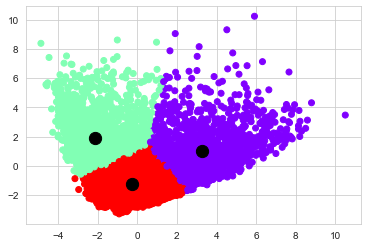

In [20]:
plt.scatter(pcomponents.iloc[:, 0],pcomponents.iloc[:,1],c=y_km,cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 150, c = 'black', label = 'Centroids')
plt.show()